In [1]:
# Installs PySpark package
! pip install pyspark -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
# Imports SparkSession from pyspark.sql
from pyspark.sql import SparkSession

# Creates a SparkSession object with the name "Project Code"
spark = SparkSession.builder.appName("Project Code").getOrCreate()

# Imports my Google Drive from google.colab
from google.colab import drive

# Mounts the Google Drive at the specified directory "/content/drive"
drive.mount('/content/drive')

Mounted at /content/drive


This code sets up a Spark session for accessing files from my Google Drive in Colab.

In [4]:
# Defines the file path where the stats file is located in my Google Drive
file_path = '/content/drive/MyDrive/Spring 2024/IST 718/stats3.csv'

# Reads the CSV file into a dataframe and indicates that the first row contains column names
df = spark.read.csv(file_path, header=True, inferSchema=True)

In [5]:
df.show()

+---------------------+---------+----+----------+---+---+--------+---------+----------+-----------+----------------+-----+-----+-----+-----------------+----------------+------------------+------------------+----------------+--------------+---------------+---------------+----------------+-------------+-------------+------------+--------------------+----------------+
|last_name, first_name|player_id|year|player_age| pa|hit|home_run|k_percent|bb_percent|batting_avg|on_base_plus_slg|babip| woba|xwoba|exit_velocity_avg|launch_angle_avg|sweet_spot_percent|barrel_batted_rate|hard_hit_percent|avg_best_speed|avg_hyper_speed|z_swing_percent|oz_swing_percent|whiff_percent|swing_percent|pull_percent|straightaway_percent|opposite_percent|
+---------------------+---------+----+----------+---+---+--------+---------+----------+-----------+----------------+-----+-----+-----+-----------------+----------------+------------------+------------------+----------------+--------------+---------------+---------

In [6]:
df.summary().show()

+-------+---------------------+-----------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+-----------------+------------------+----------------+-----------------+-----------------+--------------------+-----------------+
|summary|last_name, first_name|        player_id|              year|       player_age|                pa|              hit|          home_run|         k_percent|        bb_percent|         batting_avg|   on_base_plus_slg|               babip|               woba|              xwoba|exit_velocity_avg|  launch_angle_avg|sweet_spot_percent|barrel_batted_rate| hard_hit_percent|    avg_best_speed|   avg_hyper_speed|  z_swing_percent|  oz_swing_percent|   whif

Shows the top 20 rows of the stats dataframe, 'df', and prints summary statistics fo every column

In [7]:
# Imports the concat_ws function from pyspark.sql.functions
from pyspark.sql.functions import concat_ws

# Renames the column "last_name, first_name" to "name"
df = df.withColumnRenamed("last_name, first_name", "name")

# Concatenates the strings in the "name" and "year" columns with a separator and creates the column "player_year"
df = df.withColumn('player_year', concat_ws(' ', df.name, df.year))

# Filters the DataFrame where 'pa' (plate appearances) is greater than or equal to 200
df_rate = df.filter(df['pa'] >= 200)

Some data cleaning is done changing column names and filtering the dataframe to remove outlier hitting seasons before visualization and analysis

<Figure size 640x480 with 0 Axes>

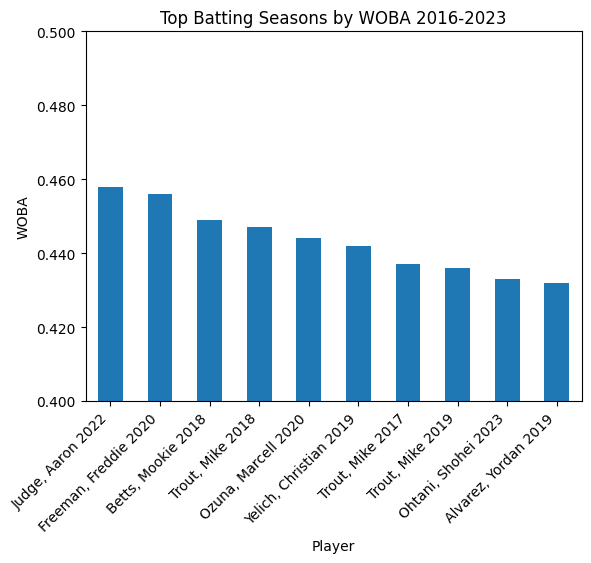

In [8]:
# Importing required libraries
import matplotlib.pyplot as plt
import pandas as pd

# Sorting the DataFrame by 'woba' column in descending order
df_sorted = df_rate.sort("woba", ascending=False)

# Selecting the top 10 rows from the sorted DataFrame
df_top10 = df_sorted.limit(10)

# Creating a new matplotlib figure
plt.figure()

# Converting the top 10 rows DataFrame to Pandas and creating a bar chart with 'player_year' and 'woba'
ax = df_top10.toPandas().plot(kind='bar', x='player_year', y='woba', legend=False)

# Formatting the y-axis to three decimal places
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.3f'))

# Setting y-axis limits
ax.set_ylim(0.400, 0.500)

# Setting the title, x-label, and y-label of the plot
plt.title('Top Batting Seasons by WOBA 2016-2023')
plt.xlabel('Player')
plt.ylabel('WOBA')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.show()

Plot provides context for rest of analysis where top 10 woba seasons are displayed on plot

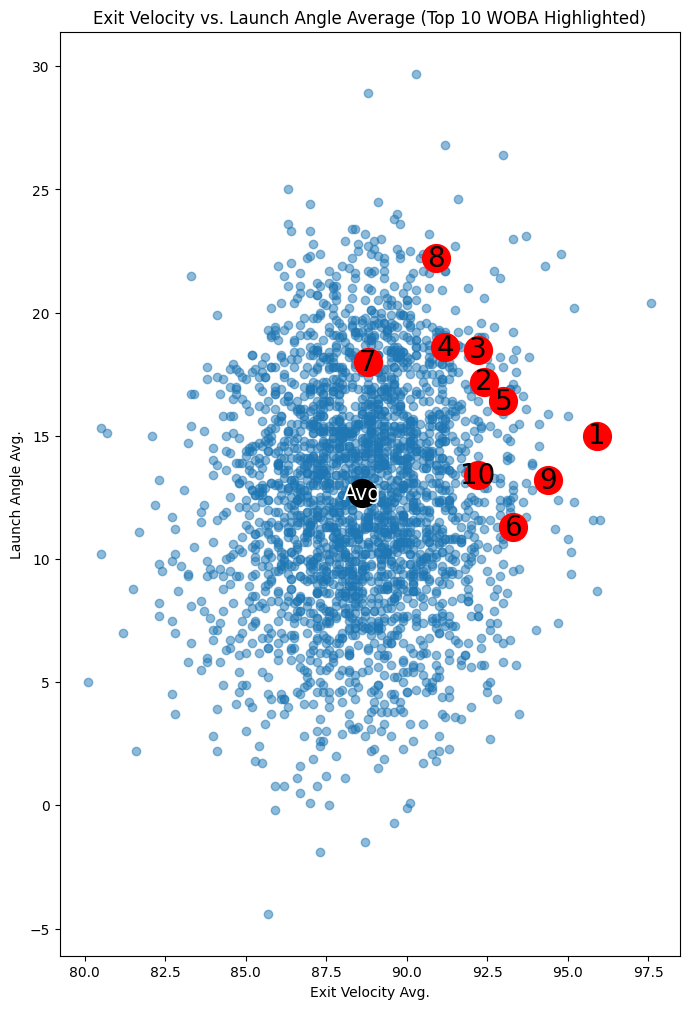

In [9]:
# Importing required libraries
import numpy as np

# Converting the Spark DataFrame to Pandas
df_pandas = df_rate.toPandas()

# Creating a new matplotlib figure
plt.figure(figsize=(8,12))

# Creating a scatter plot with exit velocity average and launch angle average
plt.scatter(df_pandas['exit_velocity_avg'], df_pandas['launch_angle_avg'], alpha=0.5)

# Plotting the top 10 players' woba seasons as red points with rank within point
for i, row in df_top10.toPandas().iterrows():
    plt.scatter(row['exit_velocity_avg'], row['launch_angle_avg'], color='red', s=400)
    plt.text(row['exit_velocity_avg'], row['launch_angle_avg'], str(i+1), fontsize=20, color='black', ha='center', va='center')

# Calculating the average exit velocity and launch angle
avg_ev = np.mean(df_pandas['exit_velocity_avg'])
avg_la = np.mean(df_pandas['launch_angle_avg'])

# Plotting the average exit velocity and launch angle as a black point with 'Avg' as label
plt.scatter(avg_ev, avg_la, color='black', s=400)
plt.text(avg_ev, avg_la, 'Avg', fontsize=15, color='white', ha='center', va='center')

# Adding title, x-label, and y-label to the plot
plt.title('Exit Velocity vs. Launch Angle Average (Top 10 WOBA Highlighted)')
plt.xlabel('Exit Velocity Avg.')
plt.ylabel('Launch Angle Avg.')

# Displaying the plot
plt.show()

Creation of scatterplot displaying exit velocity average and launch angle average for every season in dataset. Top 10 woba seasons as well as averages of the statistics from the x and y axis are displayed for context as to where great and average players place

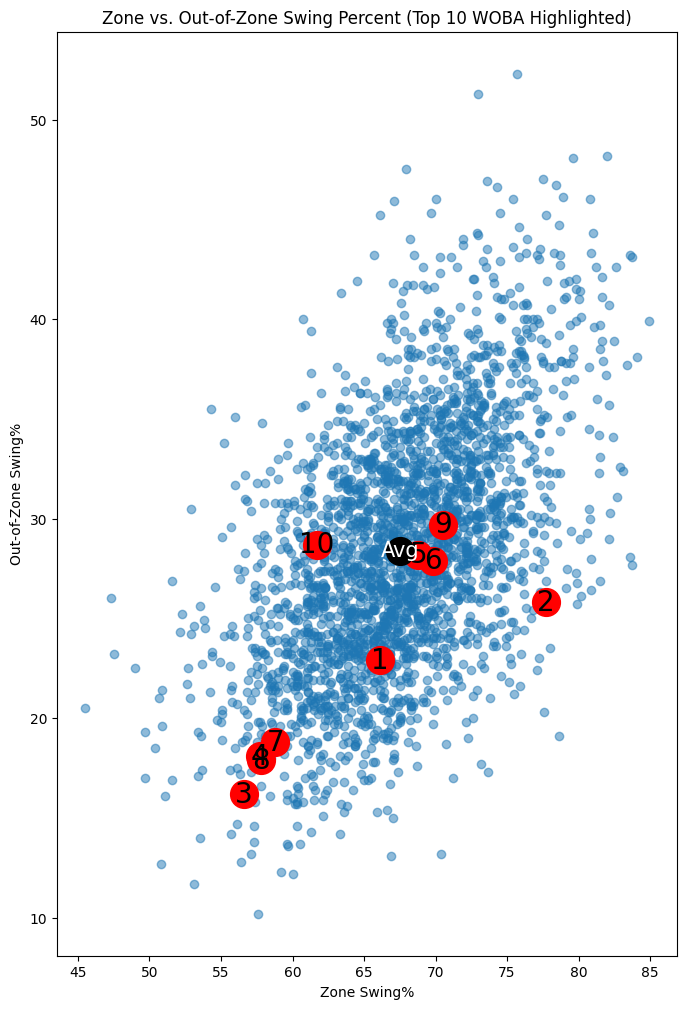

In [11]:
# Converting the Spark DataFrame to Pandas
df_pandas = df_rate.toPandas()

# Creating a new matplotlib figure
plt.figure(figsize=(8,12))

# Creating a scatter plot with 'z_swing_percent' and 'oz_swing_percent'
plt.scatter(df_pandas['z_swing_percent'], df_pandas['oz_swing_percent'], alpha=0.5)

# Plotting the top 10 players' woba seasons as red points with rank within point
for i, row in df_top10.toPandas().iterrows():
    plt.scatter(row['z_swing_percent'], row['oz_swing_percent'], color='red', s=400)
    plt.text(row['z_swing_percent'], row['oz_swing_percent'], str(i+1), fontsize=20, color='black', ha='center', va='center')

# Calculating the average 'z_swing_percent' and 'oz_swing_percent'
avg_z = np.mean(df_pandas['z_swing_percent'])
avg_oz = np.mean(df_pandas['oz_swing_percent'])

# Plotting the average 'z_swing_percent' and 'oz_swing_percent' as a black point with 'Avg' as label
plt.scatter(avg_z, avg_oz, color='black', s=400)
plt.text(avg_z, avg_oz, 'Avg', fontsize=15, color='white', ha='center', va='center')

# Adding title, x-label, and y-label to the plot
plt.title('Zone vs. Out-of-Zone Swing Percent (Top 10 WOBA Highlighted)')
plt.xlabel('Zone Swing%')
plt.ylabel('Out-of-Zone Swing%')

# Displaying the plot
plt.show()

Creation of scatterplot displaying zone swing percent average and out of zone swing percent average for every season in dataset. Top 10 woba seasons as well as averages of the statistics from the x and y axis are displayed for context as to where great and average players place

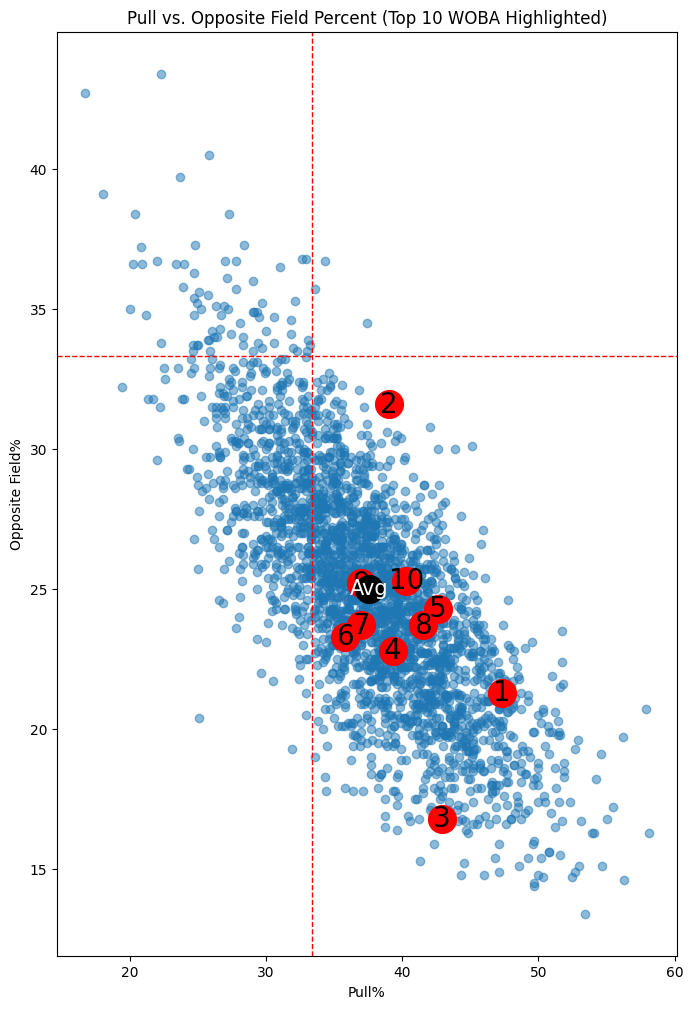

In [12]:
# Converting the Spark DataFrame to Pandas
df_pandas = df_rate.toPandas()

# Creating a new matplotlib figure
plt.figure(figsize=(8,12))

# Creating a scatter plot with 'pull_percent' and 'opposite_percent'
plt.scatter(df_pandas['pull_percent'], df_pandas['opposite_percent'], alpha=0.5)

# Plotting the top 10 players' woba seasons as red points with rank within point
for i, row in df_top10.toPandas().iterrows():
    plt.scatter(row['pull_percent'], row['opposite_percent'], color='red', s=400)
    plt.text(row['pull_percent'], row['opposite_percent'], str(i+1), fontsize=20, color='black', ha='center', va='center')

# Calculating the average 'pull_percent' and 'opposite_percent'
avg_pull = np.mean(df_pandas['pull_percent'])
avg_opposite = np.mean(df_pandas['opposite_percent'])

# Plotting the average 'pull_percent' and 'opposite_percent' as a black point with 'Avg' as label
plt.scatter(avg_pull, avg_opposite, color='black', s=400)
plt.text(avg_pull, avg_opposite, 'Avg', fontsize=15, color='white', ha='center', va='center')

# Adding vertical and horizontal dashed lines at 33.33333% as a reference to a balanced hit location
plt.axvline(x=33.33333, color='red', linestyle='--', linewidth=1)
plt.axhline(y=33.33333, color='red', linestyle='--', linewidth=1)

# Adding title, x-label, and y-label to the plot
plt.title('Pull vs. Opposite Field Percent (Top 10 WOBA Highlighted)')
plt.xlabel('Pull%')
plt.ylabel('Opposite Field%')

# Displaying the plot
plt.show()

Creation of scatterplot displaying pull percent average and opposite field percent average for every season in dataset. Top 10 woba seasons as well as averages of the statistics from the x and y axis are displayed for context as to where great and average players place

In [13]:
# Install the seaborn library
!pip install seaborn

In [14]:
# Importing required libraries
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Convert Spark DataFrame to Pandas
df_pandas = df.select("woba", "launch_angle_avg").toPandas()

# Sort DataFrame by launch_angle_avg for plotting
df_pandas.sort_values(by="launch_angle_avg", inplace=True)

# Define degrees to test
degrees = [1, 2, 3, 4, 5]

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing variables to store the best degree and its corresponding RMSE
best_degree = None
best_rmse = np.inf

# Initializing variable to store the best polynomial features object
best_poly = None

Sets up the enviroment for the polynomial regression with cross validation that will be performed

In [15]:
# Perform k-fold cross-validation
for degree in degrees:
    # Initialize list to store RMSE scores for each fold
    rmse_scores = []

    # Iterate over each fold in k-fold cross-validation
    for train_index, test_index in kf.split(df_pandas):
        # Split data into training and testing sets for the current fold
        train_data = df_pandas.iloc[train_index]
        test_data = df_pandas.iloc[test_index]

        # Create polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(train_data[["launch_angle_avg"]])
        X_test_poly = poly_features.transform(test_data[["launch_angle_avg"]])

        # Fit linear regression model
        model = LinearRegression()
        model.fit(X_train_poly, train_data["woba"])

        # Predict on test data
        y_pred = model.predict(X_test_poly)

        # Calculate RMSE for the current fold
        rmse = np.sqrt(mean_squared_error(test_data["woba"], y_pred))
        rmse_scores.append(rmse)

    # Calculate average RMSE across all folds for the current degree
    avg_rmse = np.mean(rmse_scores)

    # Print average RMSE for the current degree
    print(f"Degree {degree} Polynomial - Average RMSE: {avg_rmse:.4f}")

    # Update best degree, RMSE value, and polynomial if current degree performs better
    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_degree = degree
        best_poly = model

Degree 1 Polynomial - Average RMSE: 0.0554
Degree 2 Polynomial - Average RMSE: 0.0536
Degree 3 Polynomial - Average RMSE: 0.0535
Degree 4 Polynomial - Average RMSE: 0.0531
Degree 5 Polynomial - Average RMSE: 0.0699


This code performs the cross validation and prints the rmse scores for each tested degree and stores the best degree

In [16]:
# Generate x values for curve fitting
x_values = np.linspace(df_pandas["launch_angle_avg"].min(), df_pandas["launch_angle_avg"].max(), 100).reshape(-1, 1)

# Create polynomial features for x_values
poly_features = PolynomialFeatures(degree=best_degree)
x_values_poly = poly_features.fit_transform(x_values)

# Compute y values using the best polynomial model
y_values = best_poly.predict(x_values_poly)

# Find the maximum value of woba and corresponding launch_angle_avg
max_woba = np.max(y_values)
optimal_launch_angle = x_values[np.argmax(y_values)]

Finds the optimal value for launch angle from the peak of the woba curve

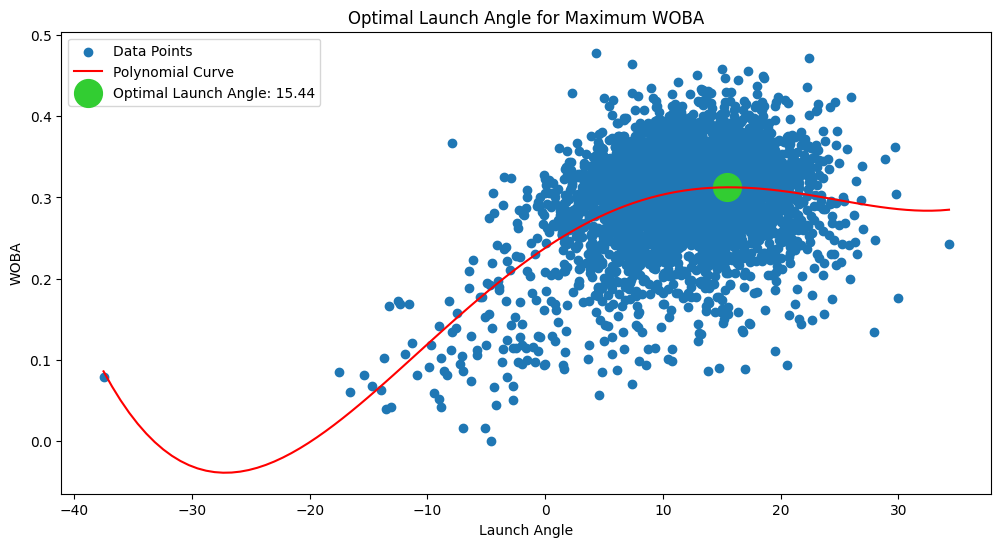

Best Polynomial Degree: 4
Best Average RMSE: 0.0531
Max WOBA: 0.31
Optimal Launch Angle: 15.44


In [17]:
# Creating a new matplotlib figure
plt.figure(figsize=(12, 6))

# Scatter plot of the actual data points
plt.scatter(df_pandas["launch_angle_avg"], df_pandas["woba"], label="Data Points")

# Plotting the polynomial curve using the computed x and y values
plt.plot(x_values, y_values, color="red", label="Polynomial Curve")

# Highlight the optimal launch angle with a larger and brighter green dot
plt.scatter(optimal_launch_angle, max_woba, color="limegreen", s=400, label=f"Optimal Launch Angle: {optimal_launch_angle[0]:.2f}")

# Adding title, x-label, y-label, and legend to the plot
plt.title("Optimal Launch Angle for Maximum WOBA")
plt.xlabel("Launch Angle")
plt.ylabel("WOBA")
plt.legend()

# Display the plot
plt.show()

# Print the best polynomial degree, best average RMSE, maximum WOBA, and optimal launch angle
print(f"Best Polynomial Degree: {best_degree}")
print(f"Best Average RMSE: {best_rmse:.4f}")
print(f"Max WOBA: {max_woba:.2f}")
print(f"Optimal Launch Angle: {optimal_launch_angle[0]:.2f}")

Creation of the plot showing launch angle and woba with the polynomial regression curve and peak value highlighted in green

In [18]:
# Convert Spark DataFrame to Pandas DataFrame
df_pandas = df.select("woba", "exit_velocity_avg").toPandas()

# Sort DataFrame by exit_velocity_avg for plotting
df_pandas.sort_values(by="exit_velocity_avg", inplace=True)

# Define degrees to test
degrees = [1, 2, 3, 4, 5]

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing variables to store the best degree and its corresponding RMSE
best_degree = None
best_rmse = np.inf

# Initializing variable to store the best polynomial features object
best_poly = None

Sets up the enviroment for the polynomial regression with cross validation that will be performed

In [19]:
# Perform k-fold cross-validation
for degree in degrees:
    # Initialize list to store RMSE scores for each fold
    rmse_scores = []

    # Iterate over each fold in k-fold cross-validation
    for train_index, test_index in kf.split(df_pandas):
        # Split data into training and testing sets for the current fold
        train_data = df_pandas.iloc[train_index]
        test_data = df_pandas.iloc[test_index]

        # Create polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(train_data[["exit_velocity_avg"]])
        X_test_poly = poly_features.transform(test_data[["exit_velocity_avg"]])

        # Fit linear regression model
        model = LinearRegression()
        model.fit(X_train_poly, train_data["woba"])

        # Predict on test data
        y_pred = model.predict(X_test_poly)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(test_data["woba"], y_pred))
        rmse_scores.append(rmse)

    # Average RMSE scores across folds
    avg_rmse = np.mean(rmse_scores)

    # Print average RMSE for the current degree
    print(f"Degree {degree} Polynomial - Average RMSE: {avg_rmse:.4f}")

    # Update best degree, RMSE value, and polynomial if current degree performs better
    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_degree = degree
        best_poly = model

Degree 1 Polynomial - Average RMSE: 0.0495
Degree 2 Polynomial - Average RMSE: 0.0493
Degree 3 Polynomial - Average RMSE: 0.0493
Degree 4 Polynomial - Average RMSE: 0.0493
Degree 5 Polynomial - Average RMSE: 0.0493


This code performs the cross validation and prints the rmse scores for each tested degree and stores the best degree

In [20]:
# Generate x values for curve fitting
x_values = np.linspace(df_pandas["exit_velocity_avg"].min(), df_pandas["exit_velocity_avg"].max(), 100).reshape(-1, 1)

# Create polynomial features for x_values
poly_features = PolynomialFeatures(degree=best_degree)
x_values_poly = poly_features.fit_transform(x_values)

# Compute y values using the best polynomial model
y_values = best_poly.predict(x_values_poly)

# Find the maximum value of woba and corresponding exit_velocity_avg
max_woba = np.max(y_values)
optimal_exit_velocity = x_values[np.argmax(y_values)]

Finds the optimal value for exit velocity from the peak of the woba curve

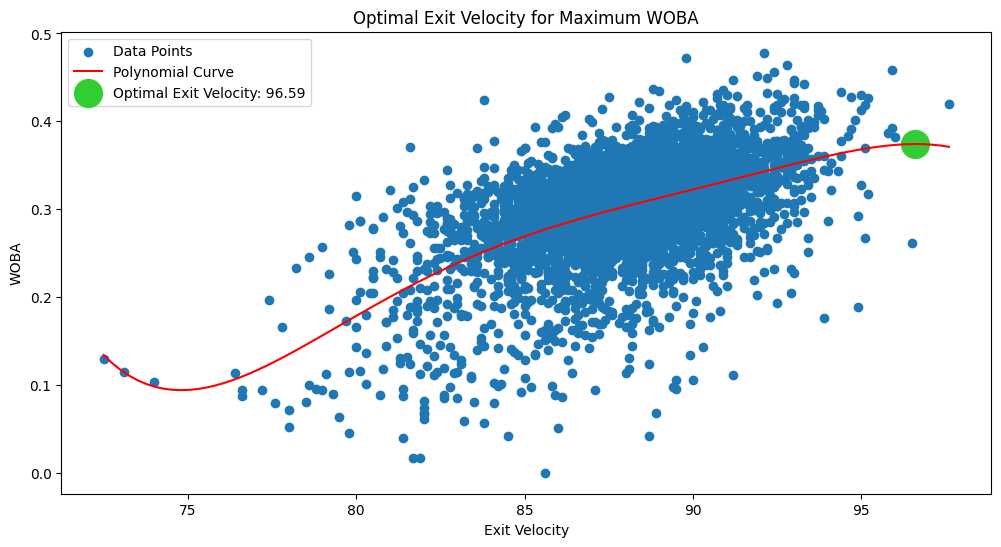

Best Polynomial Degree: 5
Best Average RMSE: 0.0493
Max WOBA: 0.37
Optimal Exit Velocity: 96.59


In [21]:
# Creating a new matplotlib figure
plt.figure(figsize=(12, 6))

# Scatter plot of the actual data points
plt.scatter(df_pandas["exit_velocity_avg"], df_pandas["woba"], label="Data Points")

# Plotting the polynomial curve using the computed x and y values
plt.plot(x_values, y_values, color="red", label="Polynomial Curve")

# Highlight the optimal exit velocity with a larger and brighter green dot
plt.scatter(optimal_exit_velocity, max_woba, color="limegreen", s=400, label=f"Optimal Exit Velocity: {optimal_exit_velocity[0]:.2f}")

# Adding title, x-label, y-label, and legend to the plot
plt.title("Optimal Exit Velocity for Maximum WOBA")
plt.xlabel("Exit Velocity")
plt.ylabel("WOBA")
plt.legend()

# Display the plot
plt.show()

# Print the best polynomial degree, best average RMSE, maximum WOBA, and optimal exit velocity
print(f"Best Polynomial Degree: {best_degree}")
print(f"Best Average RMSE: {best_rmse:.4f}")
print(f"Max WOBA: {max_woba:.2f}")
print(f"Optimal Exit Velocity: {optimal_exit_velocity[0]:.2f}")

Creation of the plot showing exit velocity and woba with the polynomial regression curve and peak value highlighted in green

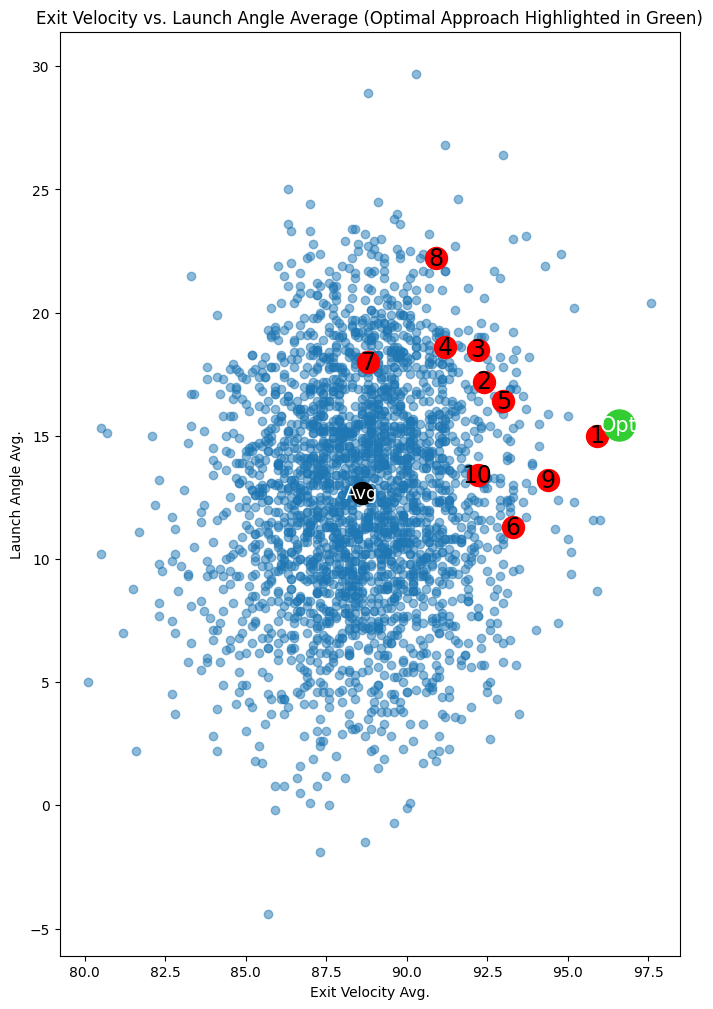

In [22]:
# Convert the Spark DataFrame to a Pandas DataFrame
df_pandas = df_rate.toPandas()

# Create a new matplotlib figure
plt.figure(figsize=(8,12))

# Create a scatter plot with 'exit_velocity_avg' and 'launch_angle_avg'
plt.scatter(df_pandas['exit_velocity_avg'], df_pandas['launch_angle_avg'], alpha=0.5)

# Plotting the top 10 players' woba seasons as red points with rank within point
for i, row in df_top10.toPandas().iterrows():
    plt.scatter(row['exit_velocity_avg'], row['launch_angle_avg'], color='red', s=250)
    plt.text(row['exit_velocity_avg'], row['launch_angle_avg'], str(i+1), fontsize=17, color='black', ha='center', va='center')

# Calculate the average 'exit_velocity_avg' and 'launch_angle_avg'
avg_ev = np.mean(df_pandas['exit_velocity_avg'])
avg_la = np.mean(df_pandas['launch_angle_avg'])

# Plot the average 'exit_velocity_avg' and 'launch_angle_avg' as a black point with 'Avg' as label
plt.scatter(avg_ev, avg_la, color='black', s=250)
plt.text(avg_ev, avg_la, 'Avg', fontsize=13, color='white', ha='center', va='center')

# Highlight the optimal approach with a larger and brighter green dot
plt.scatter(optimal_exit_velocity, optimal_launch_angle, color='limegreen', s=500)
plt.text(optimal_exit_velocity, optimal_launch_angle, 'Opt', fontsize=15, color='white', ha='center', va='center')

# Adding title, x-label, and y-label to the plot
plt.title('Exit Velocity vs. Launch Angle Average (Optimal Approach Highlighted in Green)')
plt.xlabel('Exit Velocity Avg.')
plt.ylabel('Launch Angle Avg.')

# Displaying the plot
plt.show()

Creation of scatterplot displaying exit velocity average and launch angle average for every season in dataset. Top 10 woba seasons as well as averages of the statistics from the x and y axis are displayed for context as to where great and average players place. Along with those points the green dot showing the optimal approach is displayed. Aaron Judge's 2022 season, which the #1 red dot is almost identical to the optimal approach

In [23]:
# Convert Spark DataFrame to Pandas
df_pandas = df.select("woba", "z_swing_percent").toPandas()

# Sort DataFrame by z_swing_percent for plotting
df_pandas.sort_values(by="z_swing_percent", inplace=True)

# Define degrees to test
degrees = [1, 2, 3, 4, 5]

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing variables to store the best degree and its corresponding RMSE
best_degree = None
best_rmse = np.inf

# Initializing variable to store the best polynomial features object
best_poly = None

Sets up the enviroment for the polynomial regression with cross validation that will be performed


In [24]:
# Perform k-fold cross-validation
for degree in degrees:
    # Initialize list to store RMSE scores for each fold
    rmse_scores = []

    # Iterate over each fold in k-fold cross-validation
    for train_index, test_index in kf.split(df_pandas):
        # Split data into training and testing sets for the current fold
        train_data = df_pandas.iloc[train_index]
        test_data = df_pandas.iloc[test_index]

        # Create polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(train_data[["z_swing_percent"]])
        X_test_poly = poly_features.transform(test_data[["z_swing_percent"]])

        # Fit linear regression model
        model = LinearRegression()
        model.fit(X_train_poly, train_data["woba"])

        # Predict on test data
        y_pred = model.predict(X_test_poly)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(test_data["woba"], y_pred))
        rmse_scores.append(rmse)

    # Average RMSE scores across folds
    avg_rmse = np.mean(rmse_scores)

    # Print average RMSE for the current degree
    print(f"Degree {degree} Polynomial - Average RMSE: {avg_rmse:.4f}")

    # Update best degree, RMSE value, and polynomial if current degree performs better
    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_degree = degree
        best_poly = model

Degree 1 Polynomial - Average RMSE: 0.0584
Degree 2 Polynomial - Average RMSE: 0.0580
Degree 3 Polynomial - Average RMSE: 0.0580
Degree 4 Polynomial - Average RMSE: 0.0580
Degree 5 Polynomial - Average RMSE: 0.0578


This code performs the cross validation and prints the rmse scores for each tested degree and stores the best degree

In [25]:
# Generate x values for curve fitting
x_values = np.linspace(df_pandas["z_swing_percent"].min(), df_pandas["z_swing_percent"].max(), 100).reshape(-1, 1)

# Create polynomial features for x_values
poly_features = PolynomialFeatures(degree=best_degree)
x_values_poly = poly_features.fit_transform(x_values)

# Compute y values using the best polynomial model
y_values = best_poly.predict(x_values_poly)

# Find the maximum value of woba and corresponding z_swing_percent
max_woba = np.max(y_values)
optimal_z_swing_percent = x_values[np.argmax(y_values)]

Finds the optimal value for zone swing percentage from the peak of the woba curve

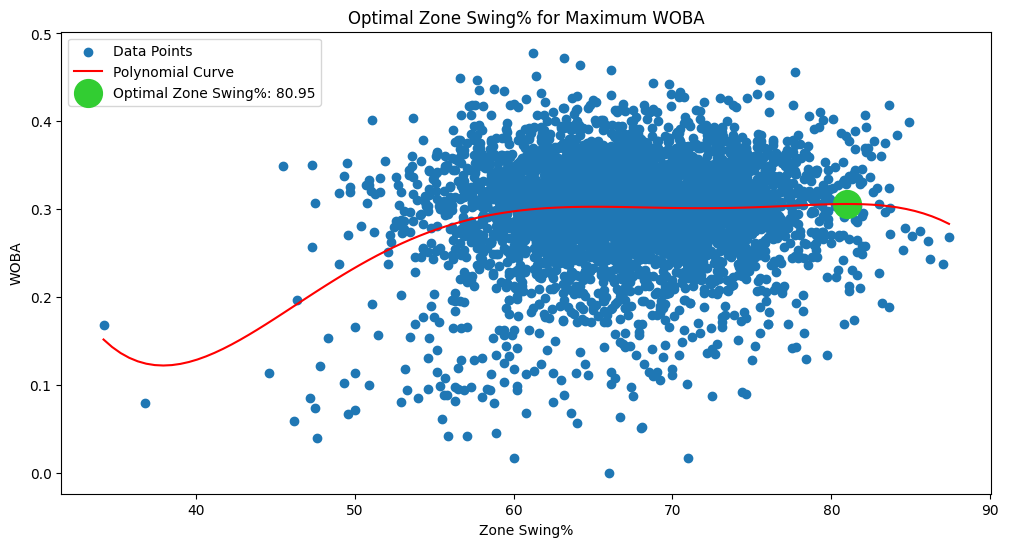

Best Polynomial Degree: 5
Best Average RMSE: 0.0578
Max WOBA: 0.31
Optimal Zone Swing%: 80.95


In [26]:
# Create a new matplotlib figure
plt.figure(figsize=(12, 6))

# Scatter plot of the actual data points
plt.scatter(df_pandas["z_swing_percent"], df_pandas["woba"], label="Data Points")

# Plotting the polynomial curve using the computed x and y values
plt.plot(x_values, y_values, color="red", label="Polynomial Curve")

# Highlight the optimal zone swing percent with a larger and brighter green dot
plt.scatter(optimal_z_swing_percent, max_woba, color="limegreen", s=400, label=f"Optimal Zone Swing%: {optimal_z_swing_percent[0]:.2f}")

# Adding title, x-label, y-label, and legend to the plot
plt.title("Optimal Zone Swing% for Maximum WOBA")
plt.xlabel("Zone Swing%")
plt.ylabel("WOBA")
plt.legend()

# Displaying the plot
plt.show()

# Print the best polynomial degree, best average RMSE, maximum WOBA, and optimal zone swing percent
print(f"Best Polynomial Degree: {best_degree}")
print(f"Best Average RMSE: {best_rmse:.4f}")
print(f"Max WOBA: {max_woba:.2f}")
print(f"Optimal Zone Swing%: {optimal_z_swing_percent[0]:.2f}")

Creation of the plot showing zone swing percentage and woba with the polynomial regression curve and peak value highlighted in green

In [27]:
# Convert Spark DataFrame to Pandas DataFrame
df_pandas = df.select("woba", "oz_swing_percent").toPandas()

# Sort DataFrame by launch_angle_avg for plotting
df_pandas.sort_values(by="oz_swing_percent", inplace=True)

# Define degrees to test
degrees = [1, 2, 3, 4, 5]

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing variables to store the best degree and its corresponding RMSE
best_degree = None
best_rmse = np.inf

# Initializing variable to store the best polynomial features object
best_poly = None

Sets up the enviroment for the polynomial regression with cross validation that will be performed

In [28]:
# Perform k-fold cross-validation
for degree in degrees:
    # Initialize list to store RMSE scores for each fold
    rmse_scores = []

    # Iterate over each fold in k-fold cross-validation
    for train_index, test_index in kf.split(df_pandas):
        # Split data into training and testing sets for the current fold
        train_data = df_pandas.iloc[train_index]
        test_data = df_pandas.iloc[test_index]

        # Create polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(train_data[["oz_swing_percent"]])
        X_test_poly = poly_features.transform(test_data[["oz_swing_percent"]])

        # Fit linear regression model
        model = LinearRegression()
        model.fit(X_train_poly, train_data["woba"])

        # Predict on test data
        y_pred = model.predict(X_test_poly)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(test_data["woba"], y_pred))
        rmse_scores.append(rmse)

    # Average RMSE scores across folds
    avg_rmse = np.mean(rmse_scores)

    # Print average RMSE for the current degree
    print(f"Degree {degree} Polynomial - Average RMSE: {avg_rmse:.4f}")

    # Update best degree, RMSE value, and polynomial if current degree performs better
    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_degree = degree
        best_poly = model

Degree 1 Polynomial - Average RMSE: 0.0566
Degree 2 Polynomial - Average RMSE: 0.0564
Degree 3 Polynomial - Average RMSE: 0.0564
Degree 4 Polynomial - Average RMSE: 0.0564
Degree 5 Polynomial - Average RMSE: 0.0565


This code performs the cross validation and prints the rmse scores for each tested degree and stores the best degree

In [29]:
# Generate x values for curve fitting
x_values = np.linspace(df_pandas["oz_swing_percent"].min(), df_pandas["oz_swing_percent"].max(), 100).reshape(-1, 1)

# Create polynomial features for x_values
poly_features = PolynomialFeatures(degree=best_degree)
x_values_poly = poly_features.fit_transform(x_values)

# Compute y values using the best polynomial model
y_values = best_poly.predict(x_values_poly)

# Find the maximum value of woba and corresponding oz_swing_percent
max_woba = np.max(y_values)
optimal_oz_swing_percent = x_values[np.argmax(y_values)]

Finds the optimal value for out of zone swing percentage from the peak of the woba curve

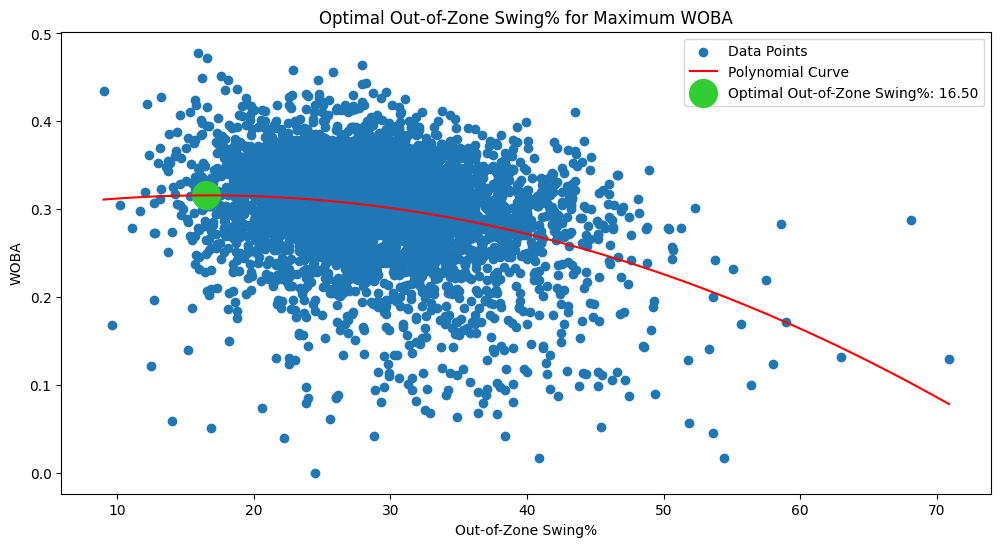

Best Polynomial Degree: 2
Best Average RMSE: 0.0564
Max WOBA: 0.32
Optimal Out-of-Zone Swing%: 16.50


In [30]:
# Create a new matplotlib figure
plt.figure(figsize=(12, 6))

# Scatter plot of the actual data points
plt.scatter(df_pandas["oz_swing_percent"], df_pandas["woba"], label="Data Points")

# Plotting the polynomial curve using the computed x and y values
plt.plot(x_values, y_values, color="red", label="Polynomial Curve")

# Highlight the optimal out-of-zone swing percentage with a larger and brighter green dot
plt.scatter(optimal_oz_swing_percent, max_woba, color="limegreen", s=400, label=f"Optimal Out-of-Zone Swing%: {optimal_oz_swing_percent[0]:.2f}")

# Adding title, x-label, y-label, and legend to the plot
plt.title("Optimal Out-of-Zone Swing% for Maximum WOBA")
plt.xlabel("Out-of-Zone Swing%")
plt.ylabel("WOBA")
plt.legend()

# Displaying the plot
plt.show()

# Print the best polynomial degree, best average RMSE, maximum WOBA, and optimal out-of-zone swing percent
print(f"Best Polynomial Degree: {best_degree}")
print(f"Best Average RMSE: {best_rmse:.4f}")
print(f"Max WOBA: {max_woba:.2f}")
print(f"Optimal Out-of-Zone Swing%: {optimal_oz_swing_percent[0]:.2f}")

Creation of the plot showing out of zone swing percentage and woba with the polynomial regression curve and peak value highlighted in green

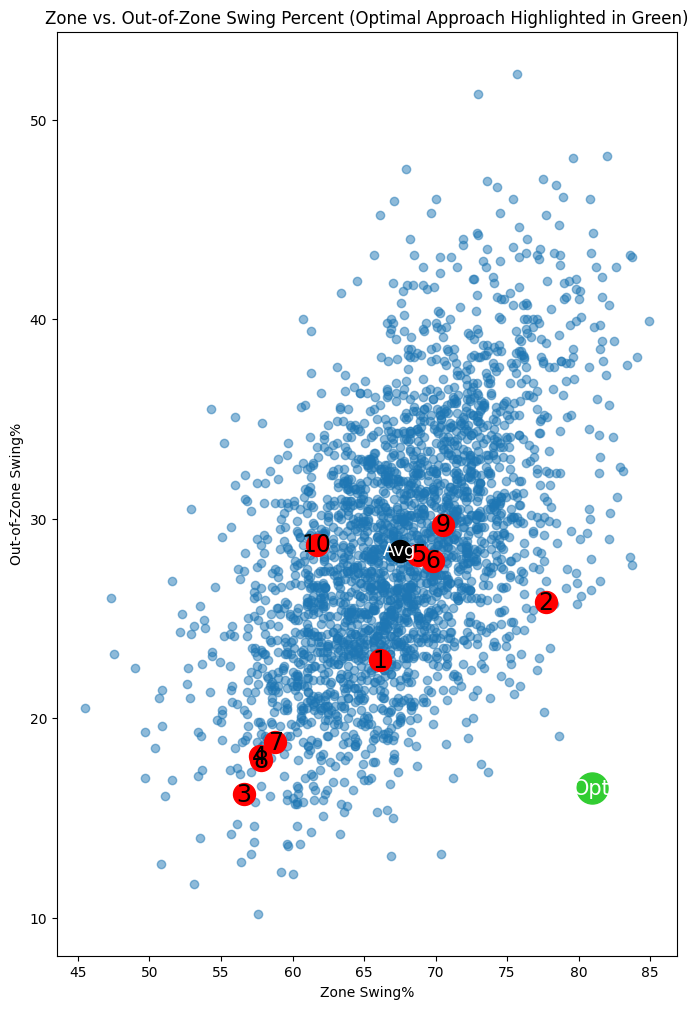

In [31]:
# Convert the Spark DataFrame to Pandas
df_pandas = df_rate.toPandas()

# Create a new matplotlib figure
plt.figure(figsize=(8, 12))

# Create a scatter plot with 'z_swing_percent' and 'oz_swing_percent'
plt.scatter(df_pandas['z_swing_percent'], df_pandas['oz_swing_percent'], alpha=0.5)

# Plotting the top 10 players' woba seasons as red points with rank within point
for i, row in df_top10.toPandas().iterrows():
    plt.scatter(row['z_swing_percent'], row['oz_swing_percent'], color='red', s=250)
    plt.text(row['z_swing_percent'], row['oz_swing_percent'], str(i+1), fontsize=17, color='black', ha='center', va='center')

# Calculate the average 'z_swing_percent' and 'oz_swing_percent'
avg_z = np.mean(df_pandas['z_swing_percent'])
avg_oz = np.mean(df_pandas['oz_swing_percent'])

# Plot the average 'z_swing_percent' and 'oz_swing_percent' as a black point with 'Avg' as label
plt.scatter(avg_z, avg_oz, color='black', s=250)
plt.text(avg_z, avg_oz, 'Avg', fontsize=13, color='white', ha='center', va='center')

# Highlight the optimal approach with a larger and brighter green dot
plt.scatter(optimal_z_swing_percent, optimal_oz_swing_percent, color='limegreen', s=500)
plt.text(optimal_z_swing_percent, optimal_oz_swing_percent, 'Opt', fontsize=15, color='white', ha='center', va='center')

# Adding title, x-label, and y-label to the plot
plt.title('Zone vs. Out-of-Zone Swing Percent (Optimal Approach Highlighted in Green)')
plt.xlabel('Zone Swing%')
plt.ylabel('Out-of-Zone Swing%')

# Displaying the plot
plt.show()

Creation of scatterplot displaying zone swing percent average and out of zone swing percent average for every season in dataset. Top 10 woba seasons as well as averages of the statistics from the x and y axis are displayed for context as to where great and average players place. Along with those points the green dot showing the optimal approach is displayed. The placement of the green dot shows some more context is needed as the optimal approach suggested seems to be unreasonable

In [32]:
# Convert Spark DataFrame to Pandas DataFrame
df_pandas = df.select("woba", "pull_percent").toPandas()

# Sort DataFrame by pull_percent for plotting
df_pandas.sort_values(by="pull_percent", inplace=True)

# Define degrees to test
degrees = [1, 2, 3, 4, 5]

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing variables to store the best degree and its corresponding RMSE
best_degree = None
best_rmse = np.inf

# Initializing variable to store the best polynomial features object
best_poly = None

Sets up the enviroment for the polynomial regression with cross validation that will be performed

In [33]:
# Perform k-fold cross-validation
for degree in degrees:
    # Initialize list to store RMSE scores for each fold
    rmse_scores = []

    # Iterate over each fold in k-fold cross-validation
    for train_index, test_index in kf.split(df_pandas):
        # Split data into training and testing sets for the current fold
        train_data = df_pandas.iloc[train_index]
        test_data = df_pandas.iloc[test_index]

        # Create polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(train_data[["pull_percent"]])
        X_test_poly = poly_features.transform(test_data[["pull_percent"]])

        # Fit linear regression model
        model = LinearRegression()
        model.fit(X_train_poly, train_data["woba"])

        # Predict on test data
        y_pred = model.predict(X_test_poly)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(test_data["woba"], y_pred))
        rmse_scores.append(rmse)

    # Average RMSE scores across folds
    avg_rmse = np.mean(rmse_scores)

    # Print average RMSE for the current degree
    print(f"Degree {degree} Polynomial - Average RMSE: {avg_rmse:.4f}")

    # Update best degree, RMSE value, and polynomial if current degree performs better
    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_degree = degree
        best_poly = model

Degree 1 Polynomial - Average RMSE: 0.0565
Degree 2 Polynomial - Average RMSE: 0.0543
Degree 3 Polynomial - Average RMSE: 0.0542
Degree 4 Polynomial - Average RMSE: 0.0542
Degree 5 Polynomial - Average RMSE: 0.0542


This code performs the cross validation and prints the rmse scores for each tested degree and stores the best degree

In [34]:
# Generate x values for curve fitting
x_values = np.linspace(df_pandas["pull_percent"].min(), df_pandas["pull_percent"].max(), 100).reshape(-1, 1)

# Create polynomial features for x_values
poly_features = PolynomialFeatures(degree=best_degree)
x_values_poly = poly_features.fit_transform(x_values)

# Compute y values using the best polynomial model
y_values = best_poly.predict(x_values_poly)

# Find the maximum value of woba and corresponding pull_percent
max_woba = np.max(y_values)
optimal_pull_percent = x_values[np.argmax(y_values)]

Finds the optimal value for pull percentage from the peak of the woba curve

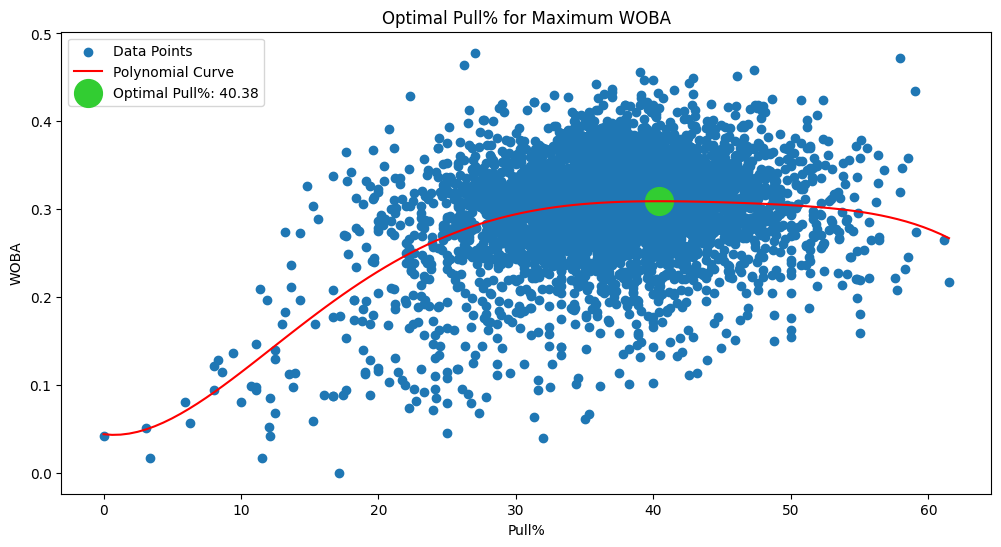

Best Polynomial Degree: 5
Best Average RMSE: 0.0542
Max WOBA: 0.31
Optimal Pull%: 40.38


In [35]:
# Create a new matplotlib figure
plt.figure(figsize=(12, 6))

# Scatter plot of the actual data points
plt.scatter(df_pandas["pull_percent"], df_pandas["woba"], label="Data Points")

# Plotting the polynomial curve using the computed x and y values
plt.plot(x_values, y_values, color="red", label="Polynomial Curve")

# Highlight the optimal pull percentage with a larger and brighter green dot
plt.scatter(optimal_pull_percent, max_woba, color="limegreen", s=400, label=f"Optimal Pull%: {optimal_pull_percent[0]:.2f}")

# Adding title, x-label, y-label, and legend to the plot
plt.title("Optimal Pull% for Maximum WOBA")
plt.xlabel("Pull%")
plt.ylabel("WOBA")
plt.legend()

# Displaying the plot
plt.show()

# Print the best polynomial degree, best average RMSE, maximum WOBA, and optimal pull percentage
print(f"Best Polynomial Degree: {best_degree}")
print(f"Best Average RMSE: {best_rmse:.4f}")
print(f"Max WOBA: {max_woba:.2f}")
print(f"Optimal Pull%: {optimal_pull_percent[0]:.2f}")

Creation of the plot showing pull percentage and woba with the polynomial regression curve and peak value highlighted in green

In [36]:
# Convert Spark DataFrame to Pandas DataFrame
df_pandas = df.select("woba", "opposite_percent").toPandas()

# Sort DataFrame by launch_angle_avg for plotting
df_pandas.sort_values(by="opposite_percent", inplace=True)

# Define degrees to test
degrees = [1, 2, 3, 4, 5]

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing variables to store the best degree and its corresponding RMSE
best_degree = None
best_rmse = np.inf

# Initializing variable to store the best polynomial features object
best_poly = None

Sets up the enviroment for the polynomial regression with cross validation that will be performed

In [37]:
# Perform k-fold cross-validation
for degree in degrees:
    # Initialize list to store RMSE scores for each fold
    rmse_scores = []

    # Iterate over each fold in k-fold cross-validation
    for train_index, test_index in kf.split(df_pandas):
        # Split data into training and testing sets for the current fold
        train_data = df_pandas.iloc[train_index]
        test_data = df_pandas.iloc[test_index]

        # Create polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(train_data[["opposite_percent"]])
        X_test_poly = poly_features.transform(test_data[["opposite_percent"]])

        # Fit linear regression model
        model = LinearRegression()
        model.fit(X_train_poly, train_data["woba"])

        # Predict on test data
        y_pred = model.predict(X_test_poly)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(test_data["woba"], y_pred))
        rmse_scores.append(rmse)

    # Average RMSE scores across folds
    avg_rmse = np.mean(rmse_scores)

    # Print average RMSE for the current degree
    print(f"Degree {degree} Polynomial - Average RMSE: {avg_rmse:.4f}")

    # Update best degree, RMSE value, and polynomial if current degree performs better
    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_degree = degree
        best_poly = model

Degree 1 Polynomial - Average RMSE: 0.0570
Degree 2 Polynomial - Average RMSE: 0.0553
Degree 3 Polynomial - Average RMSE: 0.0549
Degree 4 Polynomial - Average RMSE: 0.0548
Degree 5 Polynomial - Average RMSE: 0.0548


This code performs the cross validation and prints the rmse scores for each tested degree and stores the best degree

In [38]:
# Generate x values for curve fitting
x_values = np.linspace(df_pandas["opposite_percent"].min(), df_pandas["opposite_percent"].max(), 100).reshape(-1, 1)

# Create polynomial features for x_values
poly_features = PolynomialFeatures(degree=best_degree)
x_values_poly = poly_features.fit_transform(x_values)

# Compute y values using the best polynomial model
y_values = best_poly.predict(x_values_poly)

# Find the maximum value of woba and corresponding opposite_percent
max_woba = np.max(y_values)
optimal_opposite_percent = x_values[np.argmax(y_values)]

Finds the optimal value for opposite field percentage from the peak of the woba curve

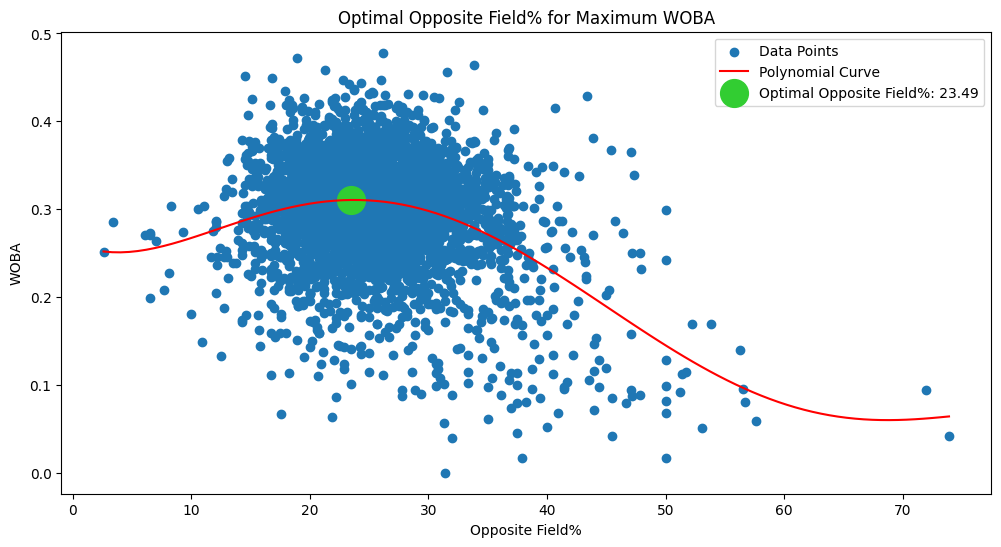

Best Polynomial Degree: 5
Best Average RMSE: 0.0548
Max WOBA: 0.31
Optimal Opposite Field%: 23.49


In [39]:
# Create a new matplotlib figure
plt.figure(figsize=(12, 6))

# Scatter plot of the actual data points
plt.scatter(df_pandas["opposite_percent"], df_pandas["woba"], label="Data Points")

# Plotting the polynomial curve using the computed x and y values
plt.plot(x_values, y_values, color="red", label="Polynomial Curve")

# Highlight the optimal opposite field percentage with a larger and brighter green dot
plt.scatter(optimal_opposite_percent, max_woba, color="limegreen", s=400, label=f"Optimal Opposite Field%: {optimal_opposite_percent[0]:.2f}")

# Adding title, x-label, y-label, and legend to the plot
plt.title("Optimal Opposite Field% for Maximum WOBA")
plt.xlabel("Opposite Field%")
plt.ylabel("WOBA")
plt.legend()

# Displaying the plot
plt.show()

# Print the best polynomial degree, best average RMSE, maximum WOBA, and optimal opposite field percentage
print(f"Best Polynomial Degree: {best_degree}")
print(f"Best Average RMSE: {best_rmse:.4f}")
print(f"Max WOBA: {max_woba:.2f}")
print(f"Optimal Opposite Field%: {optimal_opposite_percent[0]:.2f}")

Creation of the plot showing opposite field percentage and woba with the polynomial regression curve and peak value highlighted in green

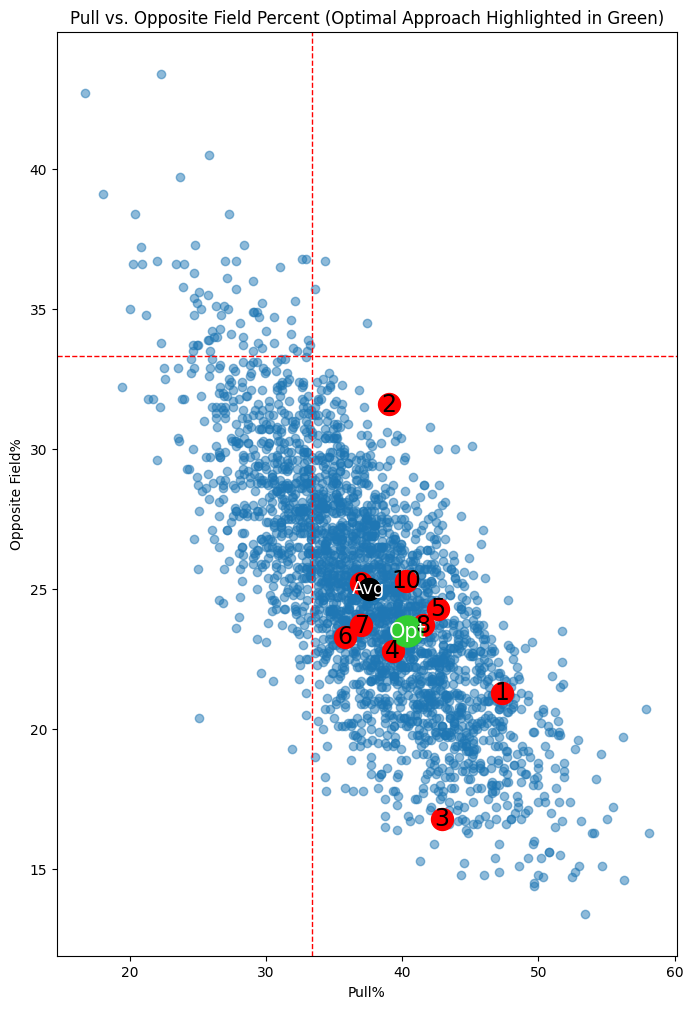

In [40]:
# Convert the Spark DataFrame to Pandas
df_pandas = df_rate.toPandas()

# Create a new matplotlib figure
plt.figure(figsize=(8, 12))

# Create a scatter plot with 'pull_percent' and 'opposite_percent'
plt.scatter(df_pandas['pull_percent'], df_pandas['opposite_percent'], alpha=0.5)

# Plotting the top 10 players' woba seasons as red points with rank within point
for i, row in df_top10.toPandas().iterrows():
    plt.scatter(row['pull_percent'], row['opposite_percent'], color='red', s=250)
    plt.text(row['pull_percent'], row['opposite_percent'], str(i+1), fontsize=17, color='black', ha='center', va='center')

# Calculate the average 'pull_percent' and 'opposite_percent'
avg_pull = np.mean(df_pandas['pull_percent'])
avg_opposite = np.mean(df_pandas['opposite_percent'])

# Plot the average 'pull_percent' and 'opposite_percent' as a black point with 'Avg' as label
plt.scatter(avg_pull, avg_opposite, color='black', s=250)
plt.text(avg_pull, avg_opposite, 'Avg', fontsize=13, color='white', ha='center', va='center')

# Add vertical and horizontal dashed lines at 33.33333 to represent a balanced hit location
plt.axvline(x=33.33333, color='red', linestyle='--', linewidth=1)
plt.axhline(y=33.33333, color='red', linestyle='--', linewidth=1)

# Highlight the optimal approach with a larger and brighter green dot
plt.scatter(optimal_pull_percent, optimal_opposite_percent, color='limegreen', s=500)
plt.text(optimal_pull_percent, optimal_opposite_percent, 'Opt', fontsize=15, color='white', ha='center', va='center')

# Adding title, x-label, and y-label to the plot
plt.title('Pull vs. Opposite Field Percent (Optimal Approach Highlighted in Green)')
plt.xlabel('Pull%')
plt.ylabel('Opposite Field%')

# Displaying the plot
plt.show()

Creation of scatterplot displaying pull percent average and opposite field percent average for every season in dataset. Top 10 woba seasons as well as averages of the statistics from the x and y axis are displayed for context as to where great and average players place. Along with those points the green dot showing the optimal approach is displayed.

In [41]:
# Import necessary functions and classes from PySpark
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Select specific columns from the original DataFrame and calculate derived columns
df_proj = df_rate.select("name", "player_id", "year", "player_age", "pa", "hit", "home_run", "batting_avg", "on_base_plus_slg", "woba", "exit_velocity_avg", "launch_angle_avg", "z_swing_percent", "oz_swing_percent", "pull_percent", "opposite_percent")
df_proj = df_proj.withColumn("pa_hit", F.col("pa") / F.col("hit"))
df_proj = df_proj.withColumn("pa_home_run", F.when(F.col("home_run") != 0, F.col("pa") / F.col("home_run")).otherwise(None))

# Convert the DataFrame to a Pandas DataFrame for easier manipulation
df_proj = df_proj.toPandas()

# Define a list of columns for which to compute averages
columns_to_avg = ["pa", "hit", "pa_hit", "home_run", "pa_home_run", "batting_avg", "on_base_plus_slg",
                  "woba", "exit_velocity_avg", "launch_angle_avg",
                  "z_swing_percent", "oz_swing_percent", "pull_percent", "opposite_percent"]

# Convert the Pandas DataFrame back to a PySpark DataFrame if necessary
df_proj = spark.createDataFrame(df_proj)

# Create an empty dictionary to store the resulting DataFrames
avg_dfs = {}

# Iterate over the columns to compute averages and percent changes
for column in columns_to_avg:
    # Group by "player_age" and aggregate statistics
    avg_df = df_proj.groupBy("player_age").agg(F.avg(F.when(F.col(column) != float('nan'), F.col(column))).alias(f"avg_{column}"),
                                                F.count("*").alias("count"))

    # Filter out age groups with fewer than 10 rows
    avg_df_filtered = avg_df.filter(avg_df["count"] >= 10)

    # Sort the DataFrame by "player_age"
    avg_df_sorted = avg_df_filtered.orderBy("player_age")

    # Calculate the percent change of the average statistic from one age to the next
    windowSpec = Window.orderBy("player_age")
    avg_df_with_prev = avg_df_sorted.withColumn(f"prev_avg_{column}", F.lag(f"avg_{column}").over(windowSpec))
    avg_df_final = avg_df_with_prev.withColumn(f"percent_change_{column}",
                                               (F.col(f"avg_{column}") - F.col(f"prev_avg_{column}")) / F.col(f"prev_avg_{column}") * 100)

    # Drop the intermediate column used for computing percent change
    avg_df_final = avg_df_final.drop(f"prev_avg_{column}")

    # Select relevant columns and alias them appropriately
    avg_df_selected = avg_df_final.select("player_age", F.col(f"avg_{column}").alias(f"avg_{column}_aging_curve"),
                                           F.col(f"percent_change_{column}"))

    # Store the resulting DataFrame in the dictionary
    avg_dfs[f"{column}_aging_curve"] = avg_df_selected

# Display an example DataFrame ("pa_aging_curve")
pa_aging_curve = avg_dfs["pa_aging_curve"]
pa_aging_curve.show()

# Convert all DataFrames to Pandas format for further analysis if needed
avg_dfs_pandas = {key: value.toPandas() for key, value in avg_dfs.items()}

+----------+------------------+-------------------+
|player_age|avg_pa_aging_curve|  percent_change_pa|
+----------+------------------+-------------------+
|        21|             424.0|               NULL|
|        22|458.98333333333335|  8.250786163522015|
|        23|           406.432|-11.449507970514542|
|        24| 424.3181818181818|  4.400780897710268|
|        25|431.90871369294604| 1.7888773566664482|
|        26| 445.7956204379562|  3.215241162020796|
|        27|418.62857142857143| -6.094059197507469|
|        28|  434.611320754717|  3.817883063166082|
|        29| 450.1085972850679| 3.5657783841063737|
|        30| 458.0473933649289| 1.7637512653047824|
|        31| 437.2565445026178| -4.539016958392967|
|        32| 420.3393939393939| -3.868930214061697|
|        33| 424.9512195121951| 1.0971671081264738|
|        34|434.64367816091954| 2.2808402949991473|
|        35| 442.2280701754386| 1.7449677507355912|
|        36|439.55882352941177|-0.6035905059052167|
|        37|

Creation of the dataframes for each statistic that compute the average for each age as well as the percent change for each increasing age. These perecent changes will be used in the projections to account for an age factor

In [42]:
avg_dfs_pandas["exit_velocity_avg_aging_curve"]

,player_age,avg_exit_velocity_avg_aging_curve,percent_change_exit_velocity_avg
0,21,89.179167,NaN
1,22,89.025000,-0.172873
2,23,89.026400,0.001573
3,24,88.654040,-0.418258
4,25,88.530705,-0.139119
5,26,88.537226,0.007366
6,27,88.409286,-0.144505
7,28,88.508679,0.112424
8,29,88.612670,0.117492
9,30,88.917062,0.343508


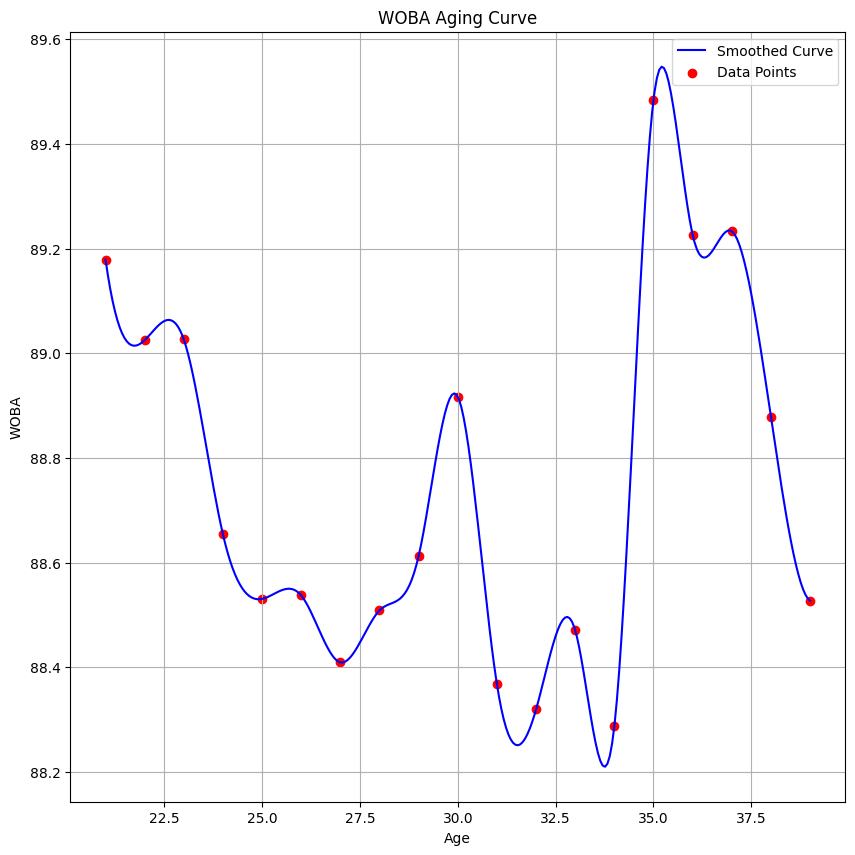

In [43]:
from scipy.interpolate import make_interp_spline

# Extracting data from the DataFrame
df_plot = avg_dfs_pandas["exit_velocity_avg_aging_curve"]

# Sorting the DataFrame by "player_age"
df_plot = df_plot.sort_values(by="player_age")

# Extracting x and y values
age = df_plot["player_age"].values
avg_exit_velocity_avg_aging_curve = df_plot["avg_exit_velocity_avg_aging_curve"].values

# Smoothing the curve
x_smooth = np.linspace(age.min(), age.max(), 300)
y_smooth = make_interp_spline(age, avg_exit_velocity_avg_aging_curve)(x_smooth)

# Creating the plot
plt.figure(figsize=(10, 10))
plt.plot(x_smooth, y_smooth, label="Smoothed Curve", color='blue')
plt.scatter(age, avg_exit_velocity_avg_aging_curve, label="Data Points", color='red')
plt.title('WOBA Aging Curve')
plt.xlabel('Age')
plt.ylabel('WOBA')
plt.grid(True)
plt.legend()
plt.show()

Creation of a plot showcasing an example aging curve for woba

In [44]:
from pyspark.sql import functions as F

def project_24(name):
    # Filter the dataframe for the given player name
    filtered_df = df_proj.filter(df_proj["name"] == name).orderBy("year", ascending=False).limit(3)
    filtered_df = filtered_df.orderBy("year", ascending=True)

    # Check if there are at least 3 rows for the player
    if filtered_df.count() < 3:
        print("Not enough player season data for projection")
        return

    # Define the weighted mean formula
    weights = [0.1, 0.3, 0.6]

    # Dictionary to store projections
    projections = {"name": name, "player_id": filtered_df.select("player_id").collect()[0]["player_id"]}

    # Calculate projections for each column
    for column in ["pa", "hit", "pa_hit", "home_run", "pa_home_run",
                   "batting_avg", "on_base_plus_slg", "woba",
                   "exit_velocity_avg", "launch_angle_avg",
                   "z_swing_percent", "oz_swing_percent",
                   "pull_percent", "opposite_percent"]:

        # Calculate the weighted mean
        weighted_mean = sum([row[column] * weight for row, weight in zip(filtered_df.collect(), weights)])

        # Get the current age and the next age
        current_age = filtered_df.collect()[2]["player_age"]
        next_age = current_age + 1

        # Retrieve the percent change from the aging curve dataframe
        percent_change = avg_dfs[f"{column}_aging_curve"].filter(avg_dfs[f"{column}_aging_curve"]["player_age"] == next_age).collect()[0][f"percent_change_{column}"]

        # Calculate the projected value
        projected_value = weighted_mean + (weighted_mean * (percent_change / 100))

        # Add the projected value to the projections dictionary
        projections[f"{column}"] = projected_value

    # Increase the "year" and "player_age" by 1
    projections["year"] = filtered_df.collect()[2]["year"] + 1
    projections["player_age"] = filtered_df.collect()[2]["player_age"] + 1

    # Create a new dataframe from the projections
    projected_df = spark.createDataFrame([projections])

    return projected_df

This code creates the function 'project_24' that produces the projections for a given player name. The previous three years are averaged used with recent years weighted more along with an age factor

The rest of the code runs an example, using the function with the example player of Shohei Ohtani

In [55]:
result = project_24("Ohtani, Shohei")
desired_columns = ["name", "year", "player_age",
                   "pa", "hit", "pa_hit", "home_run", "pa_home_run",
                   "batting_avg", "on_base_plus_slg", "woba",
                   "exit_velocity_avg", "launch_angle_avg",
                   "z_swing_percent", "oz_swing_percent",
                   "pull_percent", "opposite_percent"]

result = result.select(desired_columns)

hit = result.select("pa").collect()[0][0]/result.select("pa_hit").collect()[0][0]
home_run = result.select("pa").collect()[0][0]/result.select("pa_home_run").collect()[0][0]

result = result.withColumn("hit", F.lit(hit))
result = result.withColumn("home_run", F.lit(home_run))

desired_columns = ["name", "year", "player_age",
                   "pa", "hit", "home_run",
                   "batting_avg", "on_base_plus_slg", "woba",
                   "exit_velocity_avg", "launch_angle_avg",
                   "z_swing_percent", "oz_swing_percent",
                   "pull_percent", "opposite_percent"]

result = result.select(desired_columns)

decimal_places = {
    "pa": 0,
    "hit": 0,
    "home_run": 0,
    "batting_avg": 3,
    "on_base_plus_slg": 3,
    "woba": 3,
    "exit_velocity_avg": 1,
    "launch_angle_avg": 1,
    "z_swing_percent": 1,
    "oz_swing_percent": 1,
    "pull_percent": 1,
    "opposite_percent": 1
}

for col, dp in decimal_places.items():
    result = result.withColumn(col, F.round(result[col], dp))

    if dp == 0:
        result = result.withColumn(col, F.col(col).cast("integer"))

result.show()
result_pd = result.toPandas()

result_pd = result_pd.rename(columns={'player_age': 'age'})
result_pd = result_pd.rename(columns={'batting_avg': 'avg'})
result_pd = result_pd.rename(columns={'on_base_plus_slg': 'ops'})
result_pd = result_pd.rename(columns={'exit_velocity_avg': 'ev'})
result_pd = result_pd.rename(columns={'launch_angle_avg': 'la'})
result_pd = result_pd.rename(columns={'z_swing_percent': 'z_swing%'})
result_pd = result_pd.rename(columns={'oz_swing_percent': 'oz_swing%'})
result_pd = result_pd.rename(columns={'pull_percent': 'pull%'})
result_pd = result_pd.rename(columns={'opposite_percent': 'opp_field%'})

+--------------+----+----------+---+---+--------+-----------+----------------+-----+-----------------+----------------+---------------+----------------+------------+----------------+
|          name|year|player_age| pa|hit|home_run|batting_avg|on_base_plus_slg| woba|exit_velocity_avg|launch_angle_avg|z_swing_percent|oz_swing_percent|pull_percent|opposite_percent|
+--------------+----+----------+---+---+--------+-----------+----------------+-----+-----------------+----------------+---------------+----------------+------------+----------------+
|Ohtani, Shohei|2024|        29|645|159|      45|      0.293|            1.01|0.414|             94.0|            12.8|           70.4|            29.0|        37.5|            25.7|
+--------------+----+----------+---+---+--------+-----------+----------------+-----+-----------------+----------------+---------------+----------------+------------+----------------+



In [56]:
result_pd

,name,year,age,pa,hit,home_run,avg,ops,woba,ev,la,z_swing%,oz_swing%,pull%,opp_field%
0,"Ohtani, Shohei",2024,29,645,159,45,0.293,1.01,0.414,94.0,12.8,70.4,29.0,37.5,25.7


In [57]:
import pandas as pd

filtered_df = df_proj.filter(df_proj["name"] == "Ohtani, Shohei").orderBy("year", ascending=False).limit(3)
filtered_df = filtered_df.orderBy("year", ascending=True)
desired_columns = ["name", "year", "player_age",
                   "pa", "hit", "home_run",
                   "batting_avg", "on_base_plus_slg", "woba",
                   "exit_velocity_avg", "launch_angle_avg",
                   "z_swing_percent", "oz_swing_percent",
                   "pull_percent", "opposite_percent"]

filtered_df = filtered_df.select(desired_columns)

decimal_places = {
    "pa": 0,
    "hit": 0,
    "home_run": 0,
    "batting_avg": 3,
    "on_base_plus_slg": 3,
    "woba": 3,
    "exit_velocity_avg": 1,
    "launch_angle_avg": 1,
    "z_swing_percent": 1,
    "oz_swing_percent": 1,
    "pull_percent": 1,
    "opposite_percent": 1
}

for col, dp in decimal_places.items():
    filtered_df = filtered_df.withColumn(col, F.round(filtered_df[col], dp))

    if dp == 0:
        filtered_df = filtered_df.withColumn(col, F.col(col).cast("integer"))

filtered_df.show()
filtered_df_pd = filtered_df.toPandas()

filtered_df_pd = filtered_df_pd.rename(columns={'player_age': 'age'})
filtered_df_pd = filtered_df_pd.rename(columns={'batting_avg': 'avg'})
filtered_df_pd = filtered_df_pd.rename(columns={'on_base_plus_slg': 'ops'})
filtered_df_pd = filtered_df_pd.rename(columns={'exit_velocity_avg': 'ev'})
filtered_df_pd = filtered_df_pd.rename(columns={'launch_angle_avg': 'la'})
filtered_df_pd = filtered_df_pd.rename(columns={'z_swing_percent': 'z_swing%'})
filtered_df_pd = filtered_df_pd.rename(columns={'oz_swing_percent': 'oz_swing%'})
filtered_df_pd = filtered_df_pd.rename(columns={'pull_percent': 'pull%'})
filtered_df_pd = filtered_df_pd.rename(columns={'opposite_percent': 'opp_field%'})

+--------------+----+----------+---+---+--------+-----------+----------------+-----+-----------------+----------------+---------------+----------------+------------+----------------+
|          name|year|player_age| pa|hit|home_run|batting_avg|on_base_plus_slg| woba|exit_velocity_avg|launch_angle_avg|z_swing_percent|oz_swing_percent|pull_percent|opposite_percent|
+--------------+----+----------+---+---+--------+-----------+----------------+-----+-----------------+----------------+---------------+----------------+------------+----------------+
|Ohtani, Shohei|2021|        26|639|138|      46|      0.257|           0.964|0.393|             93.6|            16.6|           69.7|            27.3|        46.6|            22.9|
|Ohtani, Shohei|2022|        27|666|160|      34|      0.273|           0.875| 0.37|             92.9|            12.1|           72.1|            28.4|        36.0|            27.8|
|Ohtani, Shohei|2023|        28|599|151|      44|      0.304|           1.066|0.433| 

In [58]:
filtered_df_pd

,name,year,age,pa,hit,home_run,avg,ops,woba,ev,la,z_swing%,oz_swing%,pull%,opp_field%
0,"Ohtani, Shohei",2021,26,639,138,46,0.257,0.964,0.393,93.6,16.6,69.7,27.3,46.6,22.9
1,"Ohtani, Shohei",2022,27,666,160,34,0.273,0.875,0.370,92.9,12.1,72.1,28.4,36.0,27.8
2,"Ohtani, Shohei",2023,28,599,151,44,0.304,1.066,0.433,94.4,13.2,70.5,29.7,37.0,25.2


In [59]:
file_path = '/content/drive/MyDrive/Spring 2024/IST 718/ohtani.csv'

ohtani = spark.read.csv(file_path, header=True, inferSchema=True)

In [60]:
ohtani.show()

+---------------------+---------+----+----------+---+---+--------+-----------+----------------+-----+-----------------+----------------+---------------+----------------+------------+----------------+
|last_name, first_name|player_id|year|player_age| pa|hit|home_run|batting_avg|on_base_plus_slg| woba|exit_velocity_avg|launch_angle_avg|z_swing_percent|oz_swing_percent|pull_percent|opposite_percent|
+---------------------+---------+----+----------+---+---+--------+-----------+----------------+-----+-----------------+----------------+---------------+----------------+------------+----------------+
|       Ohtani, Shohei|   660271|2024|        29|110| 35|       5|      0.368|           1.094|0.467|               95|            13.8|           71.4|            27.1|        46.8|            23.4|
+---------------------+---------+----+----------+---+---+--------+-----------+----------------+-----+-----------------+----------------+---------------+----------------+------------+----------------+


In [61]:
ohtani = ohtani.withColumnRenamed("last_name, first_name", "name")

desired_columns = ["name", "year", "player_age",
                   "pa", "hit", "home_run",
                   "batting_avg", "on_base_plus_slg", "woba",
                   "exit_velocity_avg", "launch_angle_avg",
                   "z_swing_percent", "oz_swing_percent",
                   "pull_percent", "opposite_percent"]

ohtani = ohtani.select(desired_columns)

ohtani_pd = ohtani.toPandas()

ohtani_pd = ohtani_pd.rename(columns={'player_age': 'age'})
ohtani_pd = ohtani_pd.rename(columns={'batting_avg': 'avg'})
ohtani_pd = ohtani_pd.rename(columns={'on_base_plus_slg': 'ops'})
ohtani_pd = ohtani_pd.rename(columns={'exit_velocity_avg': 'ev'})
ohtani_pd = ohtani_pd.rename(columns={'launch_angle_avg': 'la'})
ohtani_pd = ohtani_pd.rename(columns={'z_swing_percent': 'z_swing%'})
ohtani_pd = ohtani_pd.rename(columns={'oz_swing_percent': 'oz_swing%'})
ohtani_pd = ohtani_pd.rename(columns={'pull_percent': 'pull%'})
ohtani_pd = ohtani_pd.rename(columns={'opposite_percent': 'opp_field%'})

In [62]:
ohtani_pd

,name,year,age,pa,hit,home_run,avg,ops,woba,ev,la,z_swing%,oz_swing%,pull%,opp_field%
0,"Ohtani, Shohei",2024,29,110,35,5,0.368,1.094,0.467,95,13.8,71.4,27.1,46.8,23.4


In [63]:
multiplier = ohtani_pd['pa']/result_pd['pa']

result_pd_comp = result_pd.copy()

result_pd_comp['pa'] *= multiplier
result_pd_comp['hit'] *= multiplier
result_pd_comp['home_run'] *= multiplier

decimal_places = {
    "pa": 0,
    "hit": 0,
    "home_run": 0
}

for col, dp in decimal_places.items():
    result_pd_comp[col] = result_pd_comp[col].round(dp)

    if dp == 0:
        result_pd_comp[col] = result_pd_comp[col].astype(int)

In [64]:
result_pd_comp

,name,year,age,pa,hit,home_run,avg,ops,woba,ev,la,z_swing%,oz_swing%,pull%,opp_field%
0,"Ohtani, Shohei",2024,29,110,27,8,0.293,1.01,0.414,94.0,12.8,70.4,29.0,37.5,25.7
